In [7]:
using TaskGraphs
using DataFrames, CSV, Query
# using Plots
using PGFPlots
using TikzPictures
tikzCommand("pdflatex")

In [ ]:
data_path = joinpath(dirname(pathof(TaskGraphs)),"..","test","profiling")

In [ ]:
filename = joinpath(data_path, "MILP_profiling_0.csv")
df = CSV.read(filename);

In [ ]:
N = sort(collect(Set{Int}(df[:N])))
M = sort(collect(Set{Int}(df[:M])))
max_parents = sort(collect(Set{Int}(df[:max_parents])))
depth_bias = sort(collect(Set(df[:depth_bias])))
termination_status = sort(collect(Set{Int}(df[:termination_status])));

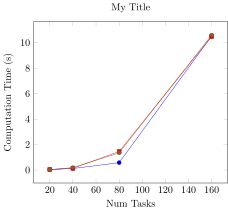

In [12]:
ax = Axis(xlabel="Num Tasks", ylabel="Computation Time (s)", title="My Title")
for mp in max_parents
    db = depth_bias[3]
    n = N[3]
    q1 = @from i in df begin
        @where i.N == n # shape
        @where i.max_parents == mp # color
        @where i.depth_bias == db # line style
        @select {i.M, i.solve_time}
        @collect DataFrame
    end
    push!(ax, Plots.Linear(Vector{Int}(q1.M),Vector{Float64}(q1.solve_time)))
end
ax